import X(二维坐标点),eps,MinPts
output IDX,isnoise(noiseFlag)

In [20]:
%cd c://Users//28763//Desktop//毕设python

c:\Users\28763\Desktop\毕设python


In [21]:
import numpy as np
import sys
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import matplotlib as mpl

# sys.path.append("..")

from utils.DataLoader import *

In [22]:
loader = DataLoader("room1", 3)
data, frames = loader.load()

In [23]:
weighted = np.array([1, 1, 0.5])
tempData = data[data["timestamp"].eq("2019-07-15 21:22:36.322000")]

In [24]:
X = weighted * tempData.iloc[:, 2:5].values
dbscan = DBSCAN(eps=0.1, min_samples=5, metric="l2")
labels = dbscan.fit_predict(X)
unique_label = np.unique(labels)
labels, unique_label

(array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  0,  0,  0,  0,  1,  1,  0,  0,  0, -1, -1, -1, -1, -1,  1, -1,
         1,  0,  0,  1,  1,  1,  1,  0,  0,  1,  1, -1], dtype=int64),
 array([-1,  0,  1], dtype=int64))

<Figure size 4000x4000 with 0 Axes>

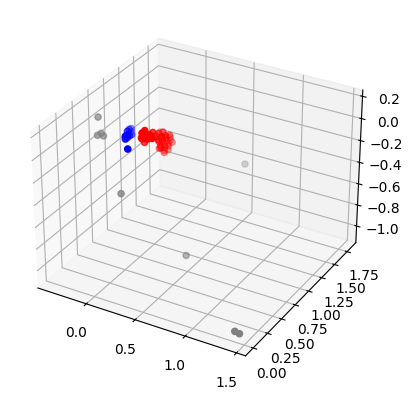

In [26]:
fig = plt.figure(figsize=(20, 20), dpi=200)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
colormap = ["red", "blue", "yellow", "gray", "green", "purple"]

for label in unique_label:
    mask = labels == label
    if label == -1:
        ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], c="gray", label="noise")
    else:
        ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], c=colormap[label], label="label")